<a href="https://colab.research.google.com/github/MaLuisa7/data_processing_and_classification_MasterDS/blob/main/Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica 2

Dependiendo del tipo de datos que Uds. estén manejando para su proyecto, van a realizar un análisis inicial de sus datos. Justifiquen el uso de ellos, y como están orientados a resolver su problemática propuesta.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers,optimizers
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
import bz2
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
import re
%matplotlib inline
import os

import seaborn as sns
import string
import nltk

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer


In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
tf.test.is_built_with_cuda()

True

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path_train = "/content/drive/MyDrive/procesamiento_clasificacion_datos/aws_reviews/train.ft.txt.bz2"
path_test = "/content/drive/MyDrive/procesamiento_clasificacion_datos/aws_reviews/test.ft.txt.bz2"

In [7]:
def getdata(file):
    labels=[]
    texts=[]
    for line in bz2.BZ2File(file):
        x=line.decode()
        labels.append(int(x[9])-1)
        texts.append(x[11:].strip())
    return np.array(labels),texts
test_labels,test_texts=getdata(path_test)
train_labels,train_texts=getdata(path_train)

In [20]:
y_train = pd.DataFrame(train_labels, columns =[ 'y_train'])
x_train = pd.DataFrame(train_texts, columns = ['x_train'])
y_test = pd.DataFrame(test_labels, columns =[ 'y_test'])
x_test = pd.DataFrame(test_texts, columns = ['x_test'])
data_train = pd.concat([x_train, y_train], axis=1)
data_test= pd.concat([x_test, y_test], axis=1)
data = pd.concat([data_train.rename(columns={'x_train':'x', 'y_train': 'y'}),
                  data_test.rename(columns={'x_test':'x', 'y_test': 'y'})], axis =0)
display(data_train.head())
display(data_test.head())

,x_train,y_train
0,Stuning even for the non-gamer: This sound tra...,1
1,The best soundtrack ever to anything.: I'm rea...,1
2,Amazing!: This soundtrack is my favorite music...,1
3,Excellent Soundtrack: I truly like this soundt...,1
4,"Remember, Pull Your Jaw Off The Floor After He...",1


,x_test,y_test
0,Great CD: My lovely Pat has one of the GREAT v...,1
1,One of the best game music soundtracks - for a...,1
2,Batteries died within a year ...: I bought thi...,0
3,"works fine, but Maha Energy is better: Check o...",1
4,Great for the non-audiophile: Reviewed quite a...,1


In [16]:
data_train.groupby('y_train').count()

,x_train
y_train,
0,1800000
1,1800000


In [17]:
data_test.groupby('y_test').count()

,x_test
y_test,
0,200000
1,200000


In [21]:
data.head()

,x,y
0,Stuning even for the non-gamer: This sound tra...,1
1,The best soundtrack ever to anything.: I'm rea...,1
2,Amazing!: This soundtrack is my favorite music...,1
3,Excellent Soundtrack: I truly like this soundt...,1
4,"Remember, Pull Your Jaw Off The Floor After He...",1


In [22]:
data_pos= data.query("y ==1 ")
data_neg= data.query("y ==0 ")


In [23]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in data_pos.x.iloc[:100000]:

    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,background_color ='white',stopwords = stopwords,min_font_size = 10).generate(comment_words)


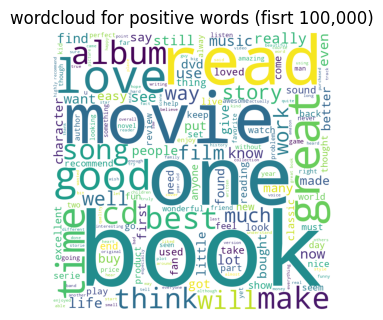

In [27]:
# plot the WordCloud image
plt.figure(figsize = (8, 3), facecolor = None)
plt.title('wordcloud for positive words (fisrt 100,000)')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [28]:

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in data_neg.x.iloc[:100000]:

    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,background_color ='white',stopwords = stopwords,min_font_size = 10).generate(comment_words)


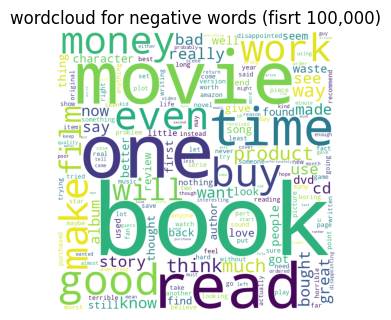

In [30]:
plt.figure(figsize = (8, 3), facecolor = None)
plt.title('wordcloud for negative words (fisrt 100,000)')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [39]:
data['Length'] = data['x'].str.len()
data.head(3)

,x,y,Length
0,Stuning even for the non-gamer: This sound tra...,1,426
1,The best soundtrack ever to anything.: I'm rea...,1,509
2,Amazing!: This soundtrack is my favorite music...,1,760


In [40]:
def word_count(review):
    review_list = review.split()
    return len(review_list)

In [41]:
data['Word_count'] = data['x'].apply(word_count)
data.head(2)

,x,y,Length,Word_count
0,Stuning even for the non-gamer: This sound tra...,1,426,80
1,The best soundtrack ever to anything.: I'm rea...,1,509,97


In [43]:
data['mean_word_length'] = data['x'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
data.head(2)

,x,y,Length,Word_count,mean_word_length
0,Stuning even for the non-gamer: This sound tra...,1,426,80,4.337500
1,The best soundtrack ever to anything.: I'm rea...,1,509,97,4.257732


In [47]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [48]:
data['mean_sent_length'] = data['x'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
data.head(2)

,x,y,Length,Word_count,mean_word_length,mean_sent_length
0,Stuning even for the non-gamer: This sound tra...,1,426,80,4.337500,60.00
1,The best soundtrack ever to anything.: I'm rea...,1,509,97,4.257732,126.75


In [60]:
data.groupby('y').mean()

<ipython-input-60-1c0ce2b04705>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('y').mean()


,Length,Word_count,mean_word_length,mean_sent_length
y,,,,
0,447.403036,81.489388,4.511159,98.592266
1,415.846256,75.464361,4.535243,97.149497


In [64]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [65]:
def clean(review):

    review = review.lower()
    review = re.sub('[^a-z A-Z 0-9-]+', '', review)
    review = " ".join([word for word in review.split() if word not in stopwords.words('english')])

    return review

In [ ]:
df['x'] = data['x'].apply(clean)
df.head(2)

In [ ]:
def corpus(text):
    text_list = text.split()
    return text_list

In [ ]:
df['Review_lists'] = df['x'].apply(corpus)
df.head(10)

In [ ]:
corpus = []
for i in trange(df.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += df['Review_lists'][i]
len(corpus)

In [ ]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

In [ ]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

In [ ]:
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

In [ ]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df['x'])

In [ ]:
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

In [ ]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

In [ ]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(df['x'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

In [ ]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()